# Initial Data Exploration

In [16]:
# necessary to import db_connector script
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add project root to sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from db_connector import load_from_excel


In [18]:
# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [19]:
# Load the data
data = load_from_excel()

In [5]:
# Examine each dataset
for name, df in data.items():
    print(f"\n\n{'='*50}")
    print(f" {name.upper()} DATASET ")
    print(f"{'='*50}")
    
    # Basic information
    print(f"\nShape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
    
    # Column information
    print("\nColumn information:")
    for col in df.columns:
        non_null = df[col].count()
        dtype = df[col].dtype
        unique = df[col].nunique()
        print(f"- {col}: {non_null} non-null values, {dtype}, {unique} unique values")
    
    # Summary statistics for numeric columns
    if df.select_dtypes(include=['number']).shape[1] > 0:
        print("\nNumeric column statistics:")
        display(df.describe())



 REQUISITIONS DATASET 

Shape: (5025, 11)

First 5 rows:


,REQUISITION_ID,REQUISITION_UID,STATUS_IN,OPEN_DATE,CLOSE_DATE,NUMBER_OF_OPENINGS,DEPARTMENT_ID,DEPARTMENT_NAME,RECRUITER_ID,RECRUITER,LAST_MODIFIED_DATE
0,223060,131427,Closed,2022-10-11 14:20:49,2023-01-03 16:11:06,8,43100,1479 - SD,2921787,M.I,2023-01-03
1,225225,131002,Closed,2022-10-07 16:09:56,2023-01-03 09:24:23,3,42318,1401 - SD,2734691,I.R,2023-01-03
2,300767,137496,Closed,2022-11-22 10:57:48,2023-01-03 12:53:07,1,41891,0380 - SD,2020433,B.S,2023-01-03
3,300803,137570,Closed,2022-11-22 15:07:08,2023-01-03 09:21:54,6,42845,1810 - SD,2734691,I.R,2023-01-03
4,306549,137881,Closed,2022-11-25 16:49:05,2023-01-03 09:25:43,2,41687,1329 - SD,2734691,I.R,2023-01-03



Column information:
- REQUISITION_ID: 5025 non-null values, int64, 4853 unique values
- REQUISITION_UID: 5025 non-null values, int64, 4853 unique values
- STATUS_IN: 5025 non-null values, object, 2 unique values
- OPEN_DATE: 5025 non-null values, datetime64[ns], 4852 unique values
- CLOSE_DATE: 4729 non-null values, datetime64[ns], 4729 unique values
- NUMBER_OF_OPENINGS: 5025 non-null values, int64, 20 unique values
- DEPARTMENT_ID: 5025 non-null values, int64, 315 unique values
- DEPARTMENT_NAME: 5025 non-null values, object, 314 unique values
- RECRUITER_ID: 5025 non-null values, int64, 37 unique values
- RECRUITER: 3485 non-null values, object, 35 unique values
- LAST_MODIFIED_DATE: 5025 non-null values, datetime64[ns], 619 unique values

Numeric column statistics:


,REQUISITION_ID,REQUISITION_UID,OPEN_DATE,CLOSE_DATE,NUMBER_OF_OPENINGS,DEPARTMENT_ID,RECRUITER_ID,LAST_MODIFIED_DATE
count,5.025000e+03,5025.000000,5025,4729,5025.000000,5025.000000,5.025000e+03,5025
mean,8.823137e+05,185378.702289,2024-01-13 01:50:32.395422976,2024-01-22 02:26:45.913723904,1.429851,45876.489154,2.183736e+06,2024-02-11 07:39:39.223880448
min,1.360830e+05,28247.000000,2020-07-29 09:07:59,2023-01-03 09:11:38,1.000000,40693.000000,1.601769e+06,2023-01-03 00:00:00
25%,5.433320e+05,162998.000000,2023-06-21 10:10:37,2023-07-13 08:31:22,1.000000,41829.000000,1.613171e+06,2023-07-24 00:00:00
50%,1.002463e+06,186604.000000,2024-01-08 15:15:47,2023-12-15 14:02:32,1.000000,42049.000000,1.622345e+06,2024-02-13 00:00:00
75%,1.245812e+06,210208.000000,2024-08-20 14:36:08,2024-08-06 15:17:50,1.000000,42366.000000,2.699752e+06,2024-09-13 00:00:00
max,1.413645e+06,225961.000000,2025-02-14 15:51:29,2025-02-14 21:14:36,30.000000,110251.000000,8.811611e+06,2025-02-20 00:00:00
std,3.567195e+05,26987.396638,NaN,NaN,1.500764,14026.787975,9.864921e+05,NaN




 CANDIDATE DATASET 

Shape: (615707, 9)

First 5 rows:


,REQUISITION_ID,PIPELINE_ID,SUBMISSION_DATE,CANDIDATE_ID,SUBMISSION_SOURCE,CANDIDATE_HISTORICAL_STATUS,HISTORICAL_STATUS_START_DATE,HISTORICAL_STATUS_END_DATE,LAST_MODIFIED_DATE
0,278292,5538745,2023-01-01 18:26:13,4524912.0,URL_p_Indeed Organic,New Submission,2023-01-01 18:26:13,2023-01-06 11:51:51,2023-01-06
1,278292,5538745,2023-01-01 18:26:13,4524912.0,URL_p_Indeed Organic,Rejected,2023-01-06 11:51:51,2023-01-06 11:52:30,2023-01-06
2,278292,5538745,2023-01-01 18:26:13,4524912.0,URL_p_Indeed Organic,Pre Offer xxx,2023-01-06 11:51:51,2023-01-06 11:52:30,2023-01-06
3,278292,5538745,2023-01-01 18:26:13,4524912.0,URL_p_Indeed Organic,Closed,2023-01-06 11:52:30,NaT,2023-01-06
4,291608,5538752,2023-01-01 14:58:13,4524783.0,URL_p_Indeed Organic,New Submission,2023-01-01 14:58:13,2023-01-04 09:34:41,2023-01-04



Column information:
- REQUISITION_ID: 615707 non-null values, int64, 4624 unique values
- PIPELINE_ID: 615707 non-null values, int64, 168569 unique values
- SUBMISSION_DATE: 615707 non-null values, object, 166913 unique values
- CANDIDATE_ID: 615690 non-null values, float64, 129677 unique values
- SUBMISSION_SOURCE: 615707 non-null values, object, 132 unique values
- CANDIDATE_HISTORICAL_STATUS: 615707 non-null values, object, 17 unique values
- HISTORICAL_STATUS_START_DATE: 615707 non-null values, datetime64[ns], 281276 unique values
- HISTORICAL_STATUS_END_DATE: 447477 non-null values, datetime64[ns], 115255 unique values
- LAST_MODIFIED_DATE: 615707 non-null values, datetime64[ns], 769 unique values

Numeric column statistics:


,REQUISITION_ID,PIPELINE_ID,CANDIDATE_ID,HISTORICAL_STATUS_START_DATE,HISTORICAL_STATUS_END_DATE,LAST_MODIFIED_DATE
count,6.157070e+05,6.157070e+05,6.156900e+05,615707,447477,615707
mean,9.003812e+05,1.339484e+07,1.036572e+07,2024-02-18 23:24:13.851199488,2024-02-23 09:36:13.571237632,2024-03-03 01:17:21.017887232
min,1.360830e+05,5.538745e+06,1.697052e+06,2023-01-01 01:24:14,2023-01-02 20:11:44,2023-01-02 00:00:00
25%,5.621130e+05,9.503073e+06,6.641383e+06,2023-08-04 09:14:12,2023-08-11 10:06:42,2023-08-17 00:00:00
50%,1.032645e+06,1.367403e+07,9.647169e+06,2024-03-18 08:56:12,2024-03-18 08:56:34,2024-03-29 00:00:00
75%,1.234086e+06,1.779380e+07,1.529034e+07,2024-08-24 11:27:46,2024-08-27 15:51:25,2024-09-17 00:00:00
max,1.413645e+06,1.902316e+07,1.836369e+07,2025-02-15 23:58:46,2025-02-15 23:33:42,2025-02-15 00:00:00
std,3.408760e+05,4.309340e+06,4.505447e+06,NaN,NaN,NaN




 CANDIDATE_STATUS DATASET 

Shape: (16, 2)

First 5 rows:


,CANDIDATE_HISTORICAL_STATUS,CANDIDATE_STAGE
0,New Submission,New Submission
1,Rejected,Rejected
2,Closed,Closed
3,In Review,In Review
4,Second Interview,Interview



Column information:
- CANDIDATE_HISTORICAL_STATUS: 16 non-null values, object, 16 unique values
- CANDIDATE_STAGE: 16 non-null values, object, 7 unique values


 DEPARTMENT DATASET 

Shape: (392, 4)

First 5 rows:


,DEPARTMENT_ID,DEPARTMENT_NAME,PARENT_DEPARTMENT_ID,PARENT_DEPARTMENT_NAME
0,40847,0717 - SD,40696,Area 16 - SD
1,40849,0720 - SD,40696,Area 16 - SD
2,40851,0724 - SD,40694,Area 14 - SD
3,40852,0725 - SD,40700,Area 20 - SD
4,40855,0729 - SD,40704,Area 24 - SD



Column information:
- DEPARTMENT_ID: 392 non-null values, int64, 392 unique values
- DEPARTMENT_NAME: 392 non-null values, object, 387 unique values
- PARENT_DEPARTMENT_ID: 392 non-null values, int64, 22 unique values
- PARENT_DEPARTMENT_NAME: 392 non-null values, object, 21 unique values

Numeric column statistics:


,DEPARTMENT_ID,PARENT_DEPARTMENT_ID
count,392.000000,392.000000
mean,45894.640306,40754.857143
std,14962.637341,184.298116
min,40690.000000,40653.000000
25%,41755.250000,40694.000000
50%,41979.500000,40700.000000
75%,42281.250000,40705.000000
max,110253.000000,41423.000000


### Key Insights 



# Examine Table Relationships

### 1. Check Requisition to Candidate relationship

In [6]:
print("\n\n" + "="*50)
print(" RELATIONSHIP ANALYSIS ")
print("="*50)

# Count candidates per requisition
candidates_per_req = data['candidate'].groupby('REQUISITION_ID').size().reset_index(name='candidate_count')
print("\nCandidate counts per requisition:")
display(candidates_per_req.describe())

# Check if all requisitions have candidates
req_with_candidates = set(data['candidate']['REQUISITION_ID'].unique())
all_req = set(data['requisitions']['REQUISITION_ID'].unique())
req_without_candidates = all_req - req_with_candidates
print(f"\nRequisitions without candidates: {len(req_without_candidates)}")
if len(req_without_candidates) > 0:
    print("Sample of requisitions without candidates:")
    display(data['requisitions'][data['requisitions']['REQUISITION_ID'].isin(req_without_candidates)].head())



 RELATIONSHIP ANALYSIS 

Candidate counts per requisition:


,REQUISITION_ID,candidate_count
count,4.624000e+03,4624.000000
mean,8.780275e+05,133.154628
std,3.466646e+05,273.104000
min,1.360830e+05,1.000000
25%,5.477498e+05,4.000000
50%,9.955835e+05,19.000000
75%,1.234337e+06,143.000000
max,1.413645e+06,4109.000000



Requisitions without candidates: 229
Sample of requisitions without candidates:


,REQUISITION_ID,REQUISITION_UID,STATUS_IN,OPEN_DATE,CLOSE_DATE,NUMBER_OF_OPENINGS,DEPARTMENT_ID,DEPARTMENT_NAME,RECRUITER_ID,RECRUITER,LAST_MODIFIED_DATE
0,223060,131427,Closed,2022-10-11 14:20:49,2023-01-03 16:11:06,8,43100,1479 - SD,2921787,M.I,2023-01-03
1,225225,131002,Closed,2022-10-07 16:09:56,2023-01-03 09:24:23,3,42318,1401 - SD,2734691,I.R,2023-01-03
2,300767,137496,Closed,2022-11-22 10:57:48,2023-01-03 12:53:07,1,41891,0380 - SD,2020433,B.S,2023-01-03
3,300803,137570,Closed,2022-11-22 15:07:08,2023-01-03 09:21:54,6,42845,1810 - SD,2734691,I.R,2023-01-03
4,306549,137881,Closed,2022-11-25 16:49:05,2023-01-03 09:25:43,2,41687,1329 - SD,2734691,I.R,2023-01-03


### 2. Analyse Department hierarchy

In [9]:
# Analyse naming patterns in department names
print("\nAnalysing department naming patterns:")

# Look for patterns like "Area X - SD" or "Region Y - SD"
area_pattern = r'Area (\d+) - SD'
region_pattern = r'Region (\d+) - SD'

# Check for matches
data['department']['has_area'] = data['department']['DEPARTMENT_NAME'].str.contains(area_pattern, regex=True)
data['department']['has_region'] = data['department']['DEPARTMENT_NAME'].str.contains(region_pattern, regex=True)

# Count pattern matches
print(f"Departments with 'Area X - SD' pattern: {data['department']['has_area'].sum()}")
print(f"Departments with 'Region X - SD' pattern: {data['department']['has_region'].sum()}")


Analysing department naming patterns:
Departments with 'Area X - SD' pattern: 22
Departments with 'Region X - SD' pattern: 2


/var/folders/3s/27y6xzfx5j55fg4s9swmhjsc0000gn/T/ipykernel_23090/1255249472.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['department']['has_area'] = data['department']['DEPARTMENT_NAME'].str.contains(area_pattern, regex=True)
/var/folders/3s/27y6xzfx5j55fg4s9swmhjsc0000gn/T/ipykernel_23090/1255249472.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['department']['has_region'] = data['department']['DEPARTMENT_NAME'].str.contains(region_pattern, regex=True)


In [10]:
# Check for other patterns
other_patterns = data['department'][~(data['department']['has_area'] | data['department']['has_region'])]
print(f"\nDepartments with other naming patterns: {len(other_patterns)}")
display(other_patterns.head())


Departments with other naming patterns: 368


,DEPARTMENT_ID,DEPARTMENT_NAME,PARENT_DEPARTMENT_ID,PARENT_DEPARTMENT_NAME,has_area,has_region
0,40847,0717 - SD,40696,Area 16 - SD,False,False
1,40849,0720 - SD,40696,Area 16 - SD,False,False
2,40851,0724 - SD,40694,Area 14 - SD,False,False
3,40852,0725 - SD,40700,Area 20 - SD,False,False
4,40855,0729 - SD,40704,Area 24 - SD,False,False


In [11]:
# Analyse parent-child relationships
print("\nAnalysing parent-child relationships:")

# Check if all departments have parents
has_parent = data['department']['PARENT_DEPARTMENT_ID'].notnull()
print(f"Departments with parent: {has_parent.sum()} ({has_parent.sum()/len(data['department'])*100:.1f}%)")
print(f"Departments without parent: {(~has_parent).sum()} ({(~has_parent).sum()/len(data['department'])*100:.1f}%)")


Analysing parent-child relationships:
Departments with parent: 392 (100.0%)
Departments without parent: 0 (0.0%)


In [12]:
# Identify top-level departments
top_level = data['department'][~has_parent]
print("\nTop-level departments (no parent):")
display(top_level.head())


Top-level departments (no parent):


,DEPARTMENT_ID,DEPARTMENT_NAME,PARENT_DEPARTMENT_ID,PARENT_DEPARTMENT_NAME,has_area,has_region


In [13]:
# Check if Region departments are parents of Area departments
areas = data['department'][data['department']['has_area']]
if not areas.empty:
    areas_with_region_parent = areas[areas['PARENT_DEPARTMENT_NAME'].str.contains('Region', na=False)]
    print(f"\nArea departments with Region parent: {len(areas_with_region_parent)} ({len(areas_with_region_parent)/len(areas)*100:.1f}%)")

# Check if Area departments are parents of store departments
stores = data['department'][~(data['department']['has_area'] | data['department']['has_region'])]
if not stores.empty:
    stores_with_area_parent = stores[stores['PARENT_DEPARTMENT_NAME'].str.contains('Area', na=False)]
    print(f"\nStore departments with Area parent: {len(stores_with_area_parent)} ({len(stores_with_area_parent)/len(stores)*100:.1f}%)")


Area departments with Region parent: 22 (100.0%)

Store departments with Area parent: 368 (100.0%)


In [14]:
# Infer department hierarchy
print("\nAttempting to infer full Region > Area > Store hierarchy:")

# Function to get department type based on name
def get_dept_type(name):
    if pd.isna(name):
        return "Unknown"
    elif re.search(r'Region \d+', name):
        return "Region"
    elif re.search(r'Area \d+', name):
        return "Area"
    else:
        return "Store"

# Add department type
data['department']['dept_type'] = data['department']['DEPARTMENT_NAME'].apply(get_dept_type)
dept_types = data['department']['dept_type'].value_counts()
print("\nDepartment types based on naming pattern:")
display(dept_types)


Attempting to infer full Region > Area > Store hierarchy:

Department types based on naming pattern:


dept_type
Store     368
Area       22
Region      2
Name: count, dtype: int64

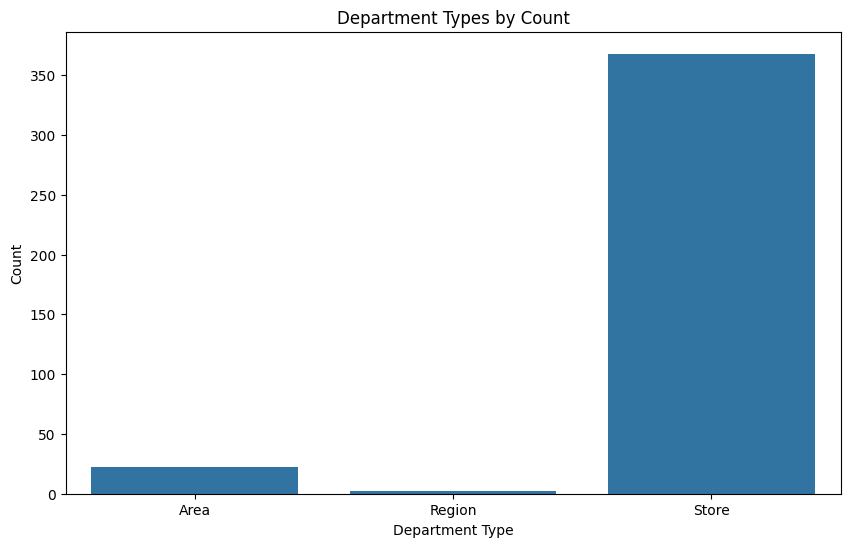

In [15]:
# visualisation
plt.figure(figsize=(10, 6))
hierarchy_data = data['department'].groupby(['dept_type']).size()
sns.barplot(x=hierarchy_data.index, y=hierarchy_data.values)
plt.title('Department Types by Count')
plt.xlabel('Department Type')
plt.ylabel('Count')
plt.show()